In [1]:
#importing Libraries
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

#for warning 
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
#Load the dataset
data = pd.read_csv("students.csv")

## Data Exploration

In [3]:
data.shape

(149, 6)

In [4]:
len(data)

149

In [5]:
data.ndim,data.size

(2, 894)

In [6]:
data.head()

,FirstGPA,SecGPA,CGPA,NOC,TOCU,SpillOver
0,2.32,3.78,3.05,0,0,0
1,3.99,3.18,3.59,8,16,0
2,0.37,4.41,2.39,12,24,1
3,3.13,1.50,2.31,2,3,1
4,2.89,0.86,1.88,3,4,1


In [7]:
data.tail()

,FirstGPA,SecGPA,CGPA,NOC,TOCU,SpillOver
144,3.90,1.31,2.60,4,7,0
145,0.08,1.51,0.80,1,6,1
146,0.79,1.63,1.21,11,4,1
147,0.15,4.56,2.35,1,1,1
148,0.72,1.60,1.16,1,1,1


In [8]:
data.isna().sum()

FirstGPA     0
SecGPA       0
CGPA         0
NOC          0
TOCU         0
SpillOver    0
dtype: int64

In [9]:
data.describe()

,FirstGPA,SecGPA,CGPA,NOC,TOCU,SpillOver
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,2.406913,2.352282,2.379597,4.946309,8.261745,0.530201
std,1.457425,1.392985,0.964906,4.029931,6.862940,0.500770
min,0.020000,0.030000,0.320000,0.000000,0.000000,0.000000
25%,1.110000,1.280000,1.740000,2.000000,3.000000,0.000000
50%,2.420000,2.140000,2.380000,4.000000,6.000000,1.000000
75%,3.750000,3.640000,2.990000,8.000000,15.000000,1.000000
max,4.870000,4.840000,4.560000,16.000000,26.000000,1.000000


In [15]:
data["SpillOver"].value_counts()

1    79
0    70
Name: SpillOver, dtype: int64

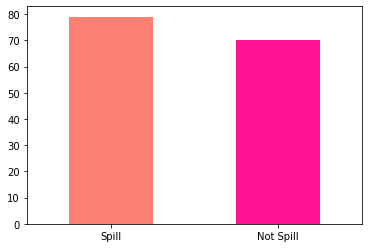

In [16]:
data["SpillOver"].value_counts().plot(kind="bar",color=["salmon","deeppink"])
plt.xticks(np.arange(2), ('Spill', 'Not Spill'),rotation=0);

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FirstGPA   149 non-null    float64
 1   SecGPA     149 non-null    float64
 2   CGPA       149 non-null    float64
 3   NOC        149 non-null    int64  
 4   TOCU       149 non-null    int64  
 5   SpillOver  149 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.1 KB


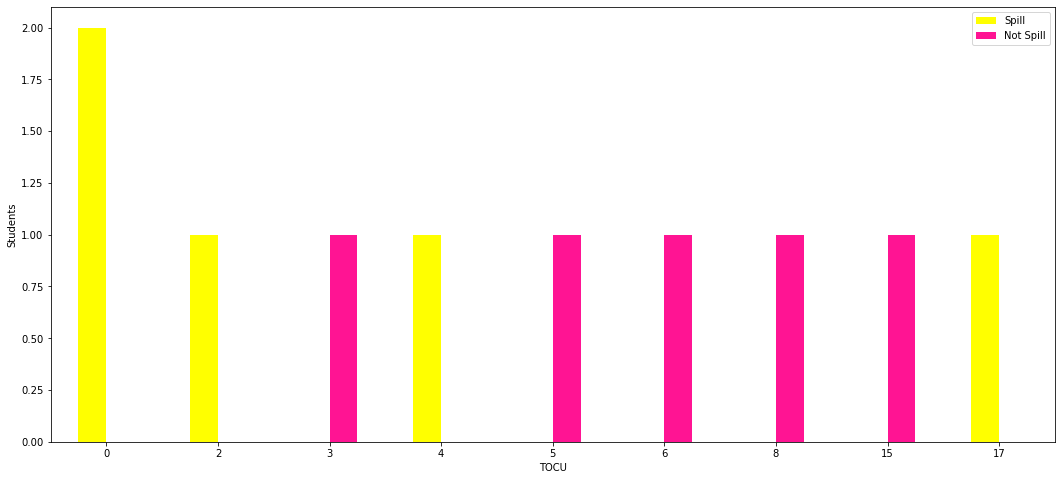

In [18]:
# Comparing Glucose with the Outcome
pd.crosstab(data.TOCU[::15],data.SpillOver).plot(kind="bar",figsize=(18,8),color=["yellow","deeppink"])
plt.ylabel("Students");
plt.xticks(rotation=0);
plt.legend(['Spill', 'Not Spill']);

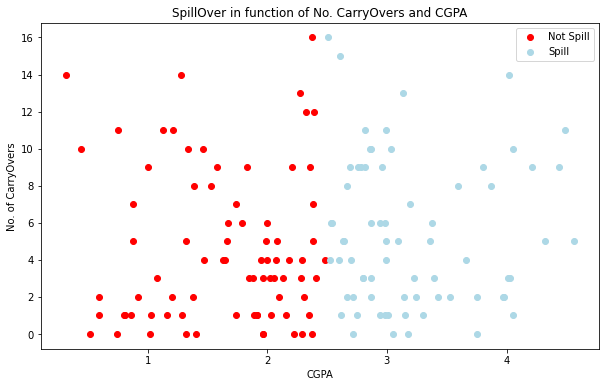

In [19]:
#finding out the Blood Pressure and age of entries who have diabetes
plt.figure(figsize=(10,6))
# Scatter with positive example
plt.scatter(data.CGPA[data.SpillOver==1],data.NOC[data.SpillOver==1],c="Red");

# Scatter with negative example
plt.scatter(data.CGPA[data.SpillOver==0],data.NOC[data.SpillOver==0],c="lightblue");

# Add some helpful info
plt.title("SpillOver in function of No. CarryOvers and CGPA")
plt.xlabel("CGPA")
plt.ylabel("No. of CarryOvers")
plt.legend(["Not Spill","Spill"]);


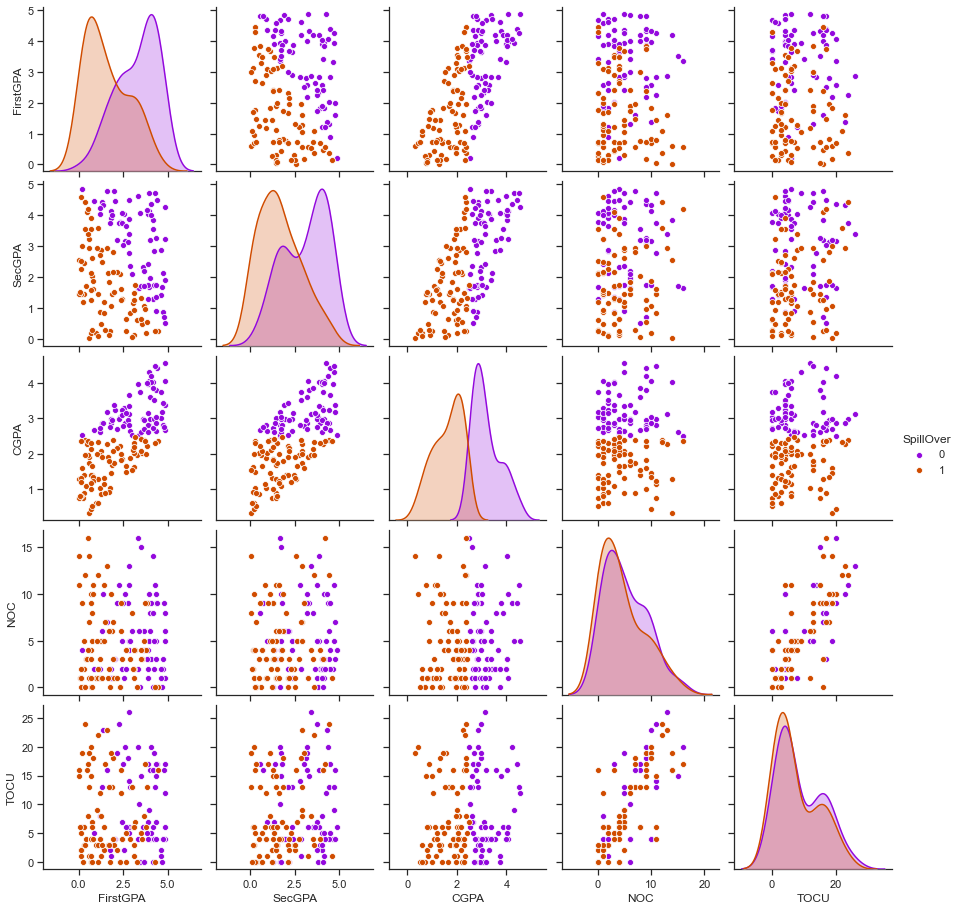

In [20]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(data,hue='SpillOver',palette='gnuplot');

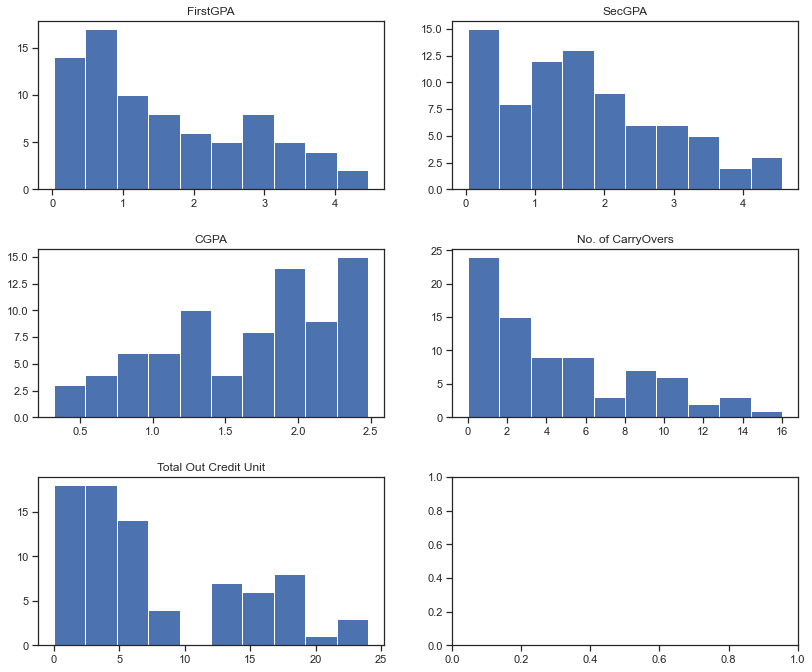

In [22]:
# Histogram of all coloumns when the Outcome is 1(Diabetes)
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('FirstGPA')
ax[0,0].hist(data.FirstGPA[data.SpillOver==1]);
ax[0,1].set_title('SecGPA')
ax[0,1].hist(data.SecGPA[data.SpillOver==1]);
ax[1,0].set_title('CGPA')
ax[1,0].hist(data.CGPA[data.SpillOver==1]);
ax[1,1].set_title('No. of CarryOvers')
ax[1,1].hist(data.NOC[data.SpillOver==1]);
ax[2,0].set_title('Total Out Credit Unit')
ax[2,0].hist(data.TOCU[data.SpillOver==1]);


In [23]:
#corelation matrix
data.corr()

,FirstGPA,SecGPA,CGPA,NOC,TOCU,SpillOver
FirstGPA,1.000000,-0.083937,0.694781,0.025028,0.006830,-0.580991
SecGPA,-0.083937,1.000000,0.658357,0.078126,0.115255,-0.512402
CGPA,0.694781,0.658357,1.000000,0.074956,0.087938,-0.808499
NOC,0.025028,0.078126,0.074956,1.000000,0.790346,-0.092939
TOCU,0.006830,0.115255,0.087938,0.790346,1.000000,-0.089804
SpillOver,-0.580991,-0.512402,-0.808499,-0.092939,-0.089804,1.000000


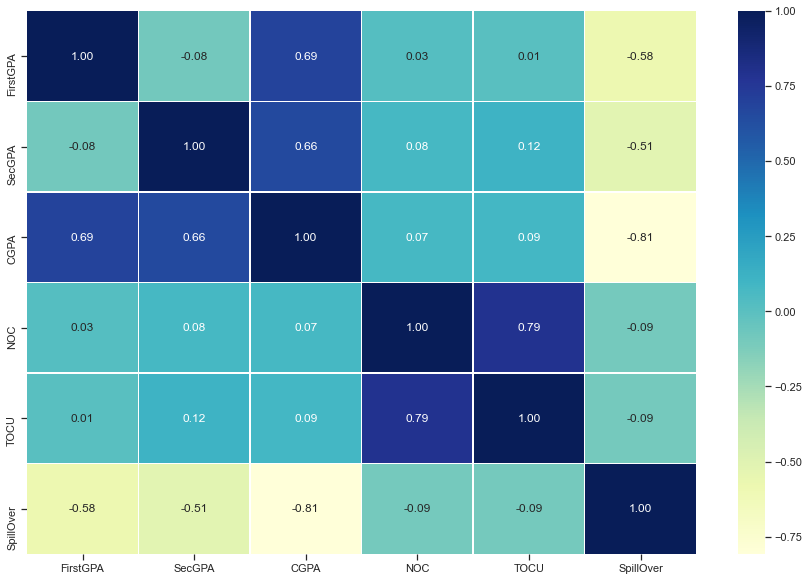

In [24]:
# make our correlation matrix visual
corr_matrix = data.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu")

# Modeling

In [25]:
#random data shuffelin
data.sample(frac=1)

#Spliting the data
X = data.drop("SpillOver",axis=1)
y = data["SpillOver"]
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2)

In [26]:
(len(X_train),len(X_test))

(119, 30)

# Trying Different Models:
            ##1.Logistic Regression
            ##2.KNN
            ##3.Random Forest Classifier
            ##4.Support Vector Machine

In [27]:
## Build an model (Logistic Regression)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train);
## Evaluating the model
log_reg = log_reg.score(X_test,y_test)

In [28]:
## Build an model (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train);
## Evaluating the model
knn = knn.score(X_test,y_test)

In [29]:
## Build an model (Random forest classifier)
clf= RandomForestClassifier()
clf.fit(X_train,y_train);
## Evaluating the model
clf = clf.score(X_test,y_test)

In [30]:
## Build an model (Support Vector Machine)
svm = SVC()
svm.fit(X_train,y_train)
svm = svm.score(X_test,y_test)

In [31]:
model_compare = pd.DataFrame({"Logistic Regression":log_reg,
                            "KNN":knn,
                            "Random Forest Classifier":clf,
                           "Support Vector Machine":svm,
                            },index=["accuracy"])

In [32]:
model_compare

,Logistic Regression,KNN,Random Forest Classifier,Support Vector Machine
accuracy,0.933333,0.8,0.966667,0.833333


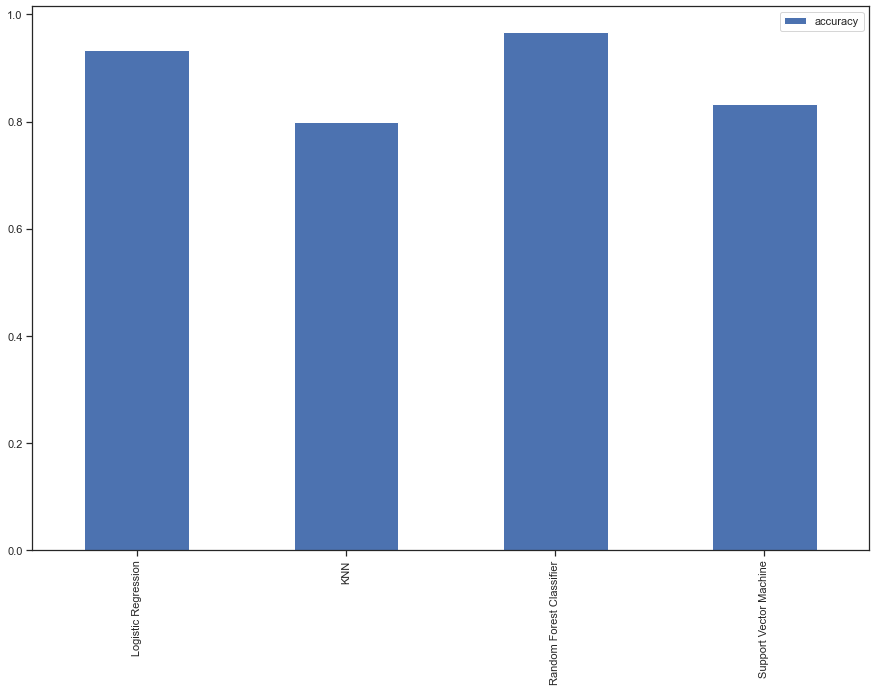

In [33]:
model_compare.T.plot.bar(figsize=(15,10));

## Hyperparameter tuning using RandomizedSearchcv


In [34]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}


In [35]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
score = rs_log_reg.score(X_test,y_test)
score

0.9333333333333333

## Using Grid Search CV Logistic Regression

In [37]:
log_reg_grid = {'C': np.logspace(-4,4,30),
               "solver":["liblinear"]}

#setup  the gird cv
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

#fit grid search cv
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [38]:
gs_log_reg.score(X_test,y_test)

0.9333333333333333

In [39]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [40]:
np.array(y_test)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

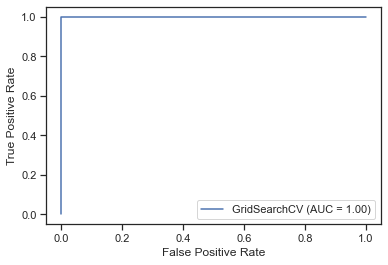

In [41]:
# plot ROC curve
plot_roc_curve(gs_log_reg,X_test,y_test)

In [42]:
#COnfusion matrix
print(confusion_matrix(y_test,y_preds))

[[14  0]
 [ 2 14]]


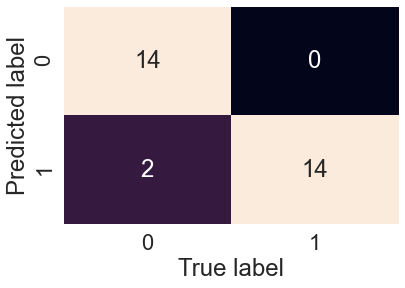

In [43]:
sns.set(font_scale=2)
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_preds), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [44]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.88      0.93        16

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30



In [45]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 17.433288221999874, 'solver': 'liblinear'}

In [46]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [47]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="accuracy")
cv_acc

array([0.86666667, 0.73333333, 1.        , 0.8       , 0.93333333,
       0.86666667, 0.73333333, 0.8       , 0.93333333, 0.78571429])

In [48]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8452380952380952

In [49]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.9666666666666668

In [50]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.7321428571428571

In [51]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8275258075258074

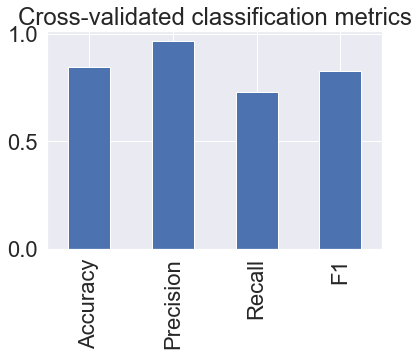

In [52]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [53]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [54]:
clf.coef_

array([[-0.34303377, -0.38063724, -0.35914356,  0.01098389,  0.05377797]])

In [55]:
feature_dict = dict(zip(data.columns, list(clf.coef_[0])))
feature_dict

{'FirstGPA': -0.3430337698823538,
 'SecGPA': -0.38063724462594584,
 'CGPA': -0.35914355794414116,
 'NOC': 0.01098388738781707,
 'TOCU': 0.05377797056863584}

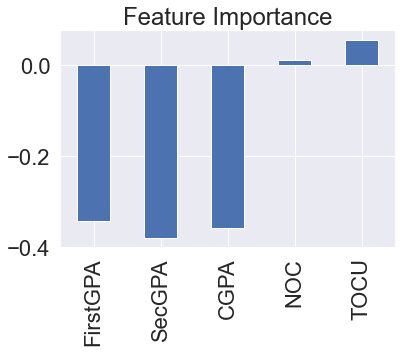

In [56]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

# Loading and Saving a model

In [57]:
import pickle

# Save trained model to file
pickle.dump(gs_log_reg, open("students.pkl", "wb"))

In [58]:
loaded_model = pickle.load(open("students.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)


0.9333333333333333

# Predicting the Outcome Using New data

In [59]:
## Enter the new data
X_test.head(1)

,FirstGPA,SecGPA,CGPA,NOC,TOCU
45,0.29,1.47,0.88,5,6


In [60]:
FirstGPA = input()
SecGPA = input()
CGPA = input()
NOC = input()
TOCU = input()
#BMI = input()
#DiabetesPedigreeFunction = input()
#Age = input()

 1.35
 2.03
 1.69
 10
 20


In [61]:
row_df = pd.DataFrame([pd.Series([FirstGPA,SecGPA,CGPA,NOC,TOCU])])

In [62]:
row_df

,0,1,2,3,4
0,1.35,2.03,1.69,10,20


In [63]:
prob = loaded_model.predict_proba(row_df)[0][1]
print(f"The probability of you Spilling is {prob}")

The probability of you Spilling is 0.9926759834118596


In [64]:
loaded_model.predict(row_df)[0]


1

## Adding the new data to the Dataset